# Twitter datasets analysis

## Imports and configs

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import logging
import matplotlib.pyplot as plt
import seaborn as sns
from concurrent.futures import ProcessPoolExecutor, as_completed

import helper
from config import Config
from stages import PreProcessing, CommunityDetection, Metrics, Analysis, Comparisons

logging.basicConfig(filename='logs/debug.log', filemode='w', level=logging.DEBUG,
                    format='%(levelname)s - %(name)s - %(message)s')

DEMON parameters:
* *epsilon*: the tolerance required in order to merge communities
* *min_community_size*: minimum number of nodes needed to form a community

In [2]:
# data_filenames = ['kdd']
data_filenames = ['ll', 'kdd', 'ECMLPKDD2018', 'emnlp2018', '#GTC18', '#IPAW2018', 'msignite2018', '#NIPS2017', 'ona18', '#provenanceweek', 'recsys', '#TCF2018']
epsilon = [0.25, 0.5]
min_community_size = 5

configs = {}
for data_fn in data_filenames:
    configs[data_fn] = []
    for e in epsilon:
        config = Config(
            data_filename=data_fn,
            demon={
                'epsilon': e,
                'min_community_size': min_community_size
            })
        configs[data_fn].append(config)

## Stages

### 1. Pre Processing

In [4]:
def pipeline_job(config):
    print(f'START job for '
          f'dataset:{config.data_filename} e:{config.demon["epsilon"]} mcs:{config.demon["min_community_size"]}')
    
#     pp = PreProcessing(config) # only once per dataset, same for all the cd parameters
#     pp.execute()
#     pp.save()
    
    cd = CommunityDetection(config)
    cd.execute()
    cd.save()
    
    m = Metrics(config)
    m.execute()
    m.save()
    
    return m
#     print(f'END job for '
#           f'dataset:"{config.data_filename}" e:{config.demon["epsilon"]} mcs:{config.demon["min_community_size"]}')
    
#     return (config.data_filename, config.demon['epsilon'], m)

m = []
config_list = [data for data_fn, data_list in configs.items() for data in data_list]
with ProcessPoolExecutor() as executor: 
    m = list(executor.map(pipeline_job, config_list))


START job for dataset:ll e:0.25 mcs:5
START job for dataset:kdd e:0.25 mcs:5
START job for dataset:kdd e:0.5 mcs:5
START job for dataset:ll e:0.5 mcs:5


Exec: 100%|████████████████████████


Time:  'execute' 0.36 sec
------------------------------------


Exec: 100%|████████████████████████


Time:  'execute' 0.48 sec
get community subgraphs for e:0.5 mcs:5
------------------------------------


get community subgraphs for e:0.25 mcs:5

get pquality for e:0.5 mcs:5



get pquality for e:0.25 mcs:5




START job for dataset:ECMLPKDD2018 e:0.25 mcs:5


Exec: 100%|████████████████████████


Time:  'execute' 0.07 sec
------------------------------------
START job for dataset:ECMLPKDD2018 e:0.5 mcs:5
START job for dataset:emnlp2018 e:0.25 mcs:5


Exec: 100%|████████████████████████
Exec:   0%|                        

Time:  'execute' 0.04 sec
------------------------------------
START job for dataset:emnlp2018 e:0.5 mcs:5


Exec: 100%|████████████████████████


Time:  'execute' 0.29 sec
------------------------------------


Exec:  17%|████                    

get community subgraphs for e:0.25 mcs:5


Exec: 100%|████████████████████████


Time:  'execute' 0.37 sec


------------------------------------
get community subgraphs for e:0.5 mcs:5

get pquality for e:0.25 mcs:5



get pquality for e:0.5 mcs:5


Exec:   0%|                        

Exec:   0%|                        

START job for dataset:#GTC18 e:0.25 mcs:5


Exec:   0%|                        

Exec:  48%|███████████▌            

START job for dataset:#GTC18 e:0.5 mcs:5


Exec: 100%|████████████████████████
Exec:   0%|                        

Time:  'execute' 0.24 sec
------------------------------------


Exec:   0%|                        

get community subgraphs for e:0.25 mcs:5


Exec: 100%|████████████████████████
Exec:   0%|                        

Time:  'execute' 0.22 sec
------------------------------------


get community subgraphs for e:0.5 mcs:5

get pquality for e:0.25 mcs:5


Exec:   0%|                        


get pquality for e:0.5 mcs:5


Exec:   0%|                        

Exec:   0%|                        

START job for dataset:#IPAW2018 e:0.25 mcs:5


Exec: 100%|████████████████████████


Time:  'execute' 0.03 sec


Exec:   0%|                        

------------------------------------
START job for dataset:#IPAW2018 e:0.5 mcs:5



Exec: 100%|████████████████████████


Time:  'execute' 0.04 sec
------------------------------------
START job for dataset:msignite2018 e:0.25 mcs:5
START job for dataset:msignite2018 e:0.5 mcs:5


Exec: 100%|████████████████████████


Time:  'execute' 0.09 sec
------------------------------------


Exec: 100%|████████████████████████


Time:  'execute' 0.11 sec
------------------------------------


Exec:   0%|                        

get community subgraphs for e:0.25 mcs:5
get community subgraphs for e:0.5 mcs:5


Exec:   0%|                        


get pquality for e:0.25 mcs:5


Exec:   0%|                        

get pquality for e:0.5 mcs:5


Exec:   0%|                        

START job for dataset:#NIPS2017 e:0.25 mcs:5


Exec:   0%|                        

Exec:  13%|███                     

START job for dataset:#NIPS2017 e:0.5 mcs:5


Exec: 100%|████████████████████████


Time:  'execute' 0.50 sec
------------------------------------


Exec:  45%|██████████▉             

get community subgraphs for e:0.25 mcs:5


Exec: 100%|████████████████████████


Time:  'execute' 0.47 sec
------------------------------------


get community subgraphs for e:0.5 mcs:5

get pquality for e:0.25 mcs:5



get pquality for e:0.5 mcs:5



START job for dataset:ona18 e:0.25 mcs:5



Exec:   0%|                        

START job for dataset:ona18 e:0.5 mcs:5


Exec: 100%|████████████████████████


Time:  'execute' 3.92 sec
------------------------------------


Exec:  85%|████████████████████▍   

get community subgraphs for e:0.25 mcs:5


Exec:   0%|                        

Exec: 100%|████████████████████████


Time:  'execute' 4.40 sec
------------------------------------

get pquality for e:0.25 mcs:5


Exec:   0%|                        

Exec:   0%|                        

get community subgraphs for e:0.5 mcs:5


Exec:   0%|                        


get pquality for e:0.5 mcs:5


Exec:   0%|                        

Exec:   0%|                        

Exec:   0%|                        

START job for dataset:#provenanceweek e:0.25 mcs:5


Exec: 100%|████████████████████████
Exec:   0%|                        

Time:  'execute' 0.06 sec
------------------------------------
START job for dataset:#provenanceweek e:0.5 mcs:5


Exec: 100%|████████████████████████


Time:  'execute' 0.02 sec
------------------------------------
START job for dataset:recsys e:0.25 mcs:5


Exec: 100%|████████████████████████


Time:  'execute' 0.23 sec
------------------------------------


Exec:   0%|                        

get community subgraphs for e:0.25 mcs:5


Exec:   0%|                        

Exec:   0%|                        

Exec:   0%|                        

get pquality for e:0.25 mcs:5


Exec:   0%|                        

Exec:   0%|                        

Exec:   0%|                        

START job for dataset:recsys e:0.5 mcs:5
START job for dataset:#TCF2018 e:0.25 mcs:5


Exec: 100%|████████████████████████
Exec:  27%|██████▍                 

Time:  'execute' 0.10 sec
------------------------------------
START job for dataset:#TCF2018 e:0.5 mcs:5


Exec: 100%|████████████████████████
Exec:  76%|██████████████████▎     

Time:  'execute' 0.06 sec
------------------------------------


Exec: 100%|████████████████████████


Time:  'execute' 0.28 sec
------------------------------------
get community subgraphs for e:0.5 mcs:5


Exec:   0%|                        


get pquality for e:0.5 mcs:5


Exec:   0%|                        

Exec:   0%|                        

Exec: 100%|████████████████████████


Time:  'execute' 197.53 sec
------------------------------------


Exec: 100%|████████████████████████


Time:  'execute' 198.20 sec
------------------------------------
get community subgraphs for e:0.5 mcs:5


get community subgraphs for e:0.25 mcs:5



get pquality for e:0.5 mcs:5



get pquality for e:0.25 mcs:5


IndexError: list index out of range

### 2. Community Detection

In [49]:
for data_fn, config in configs.items():
    print(data_fn)
    for c in config:
        print(f'compute DEMON community detection for '
              f'e:{c.demon["epsilon"]} mcs:{c.demon["min_community_size"]}')
        cd = CommunityDetection(c)
        cd.execute()
        cd.save()

ll
compute DEMON community detection for e:0.25 mcs:5
compute DEMON community detection for e:0.5 mcs:5
kdd
compute DEMON community detection for e:0.25 mcs:5
compute DEMON community detection for e:0.5 mcs:5
ECMLPKDD2018
compute DEMON community detection for e:0.25 mcs:5


IndexError: list index out of range

### 3. Metrics

In [9]:
m = {}
for data_fn, config in configs.items():
    m[data_fn] = {}
    print(data_fn)
    for c in config:
        m[data_fn][c.demon['epsilon']] = Metrics(c)
        m[data_fn][c.demon['epsilon']].execute()
        m[data_fn][c.demon['epsilon']].save()

kdd
get community subgraphs for e:0.25 mcs:5



get pquality for e:0.25 mcs:5



get community subgraphs for e:0.5 mcs:5



get pquality for e:0.5 mcs:5


## Analysis

In [10]:
e_pairwise_combs = helper.pairwise_combinations(sorted(epsilon, reverse=True))
e_pairs = [(e,e) for e in epsilon]
metric_name = 'indegree'

### Graph metrics
Graph analysis.

In [11]:
for data_fn, m_list in m.items():
    print(f'Metrics for {data_fn}')
    metric_element = list(m_list.values())[0]
    display(Metrics.graph_info(metric_element.g))

Metrics for kdd


,# nodes,# edges,avg degree,avg weighted degree,density,connected,strongly conn components,avg clustering,assortativity
0,89,410,9.2135,10.6517,0.0523,False,2,0.6071,-0.3845


* *# nodes*: number of users.
* *# edges*: number of relations between users.
* *avg degree*: average number of edges per node.
* *avg degree*: average weigth sum per node.
* *density*: expresses the how sparse is the adjacency matrix (i.e. how likely that a node has edges). 0 for a graph without edges and 1 for a complete graph.

\begin{align}
&\begin{aligned}
d = \frac{m}{n(n-1)}
\end{aligned}\\
&\begin{aligned}
m = \text{# edges}
\end{aligned}\\
&\begin{aligned}
n = \text{# nodes}
\end{aligned}
\end{align}

* *connected*: for each pairs of nodes exists a path that connects them.
* *strongly connected components*: group of nodes for which for each pair of nodes exists a path that connects them. Can be broadly relatable to the concept of community.
* *avg clustering*: average for each node of the fraction of possible triangles through that node that exist.
* *assortativity*: measures how much nodes are likely to connect to nodes with the same degree (>0) or with a different degree (<0).

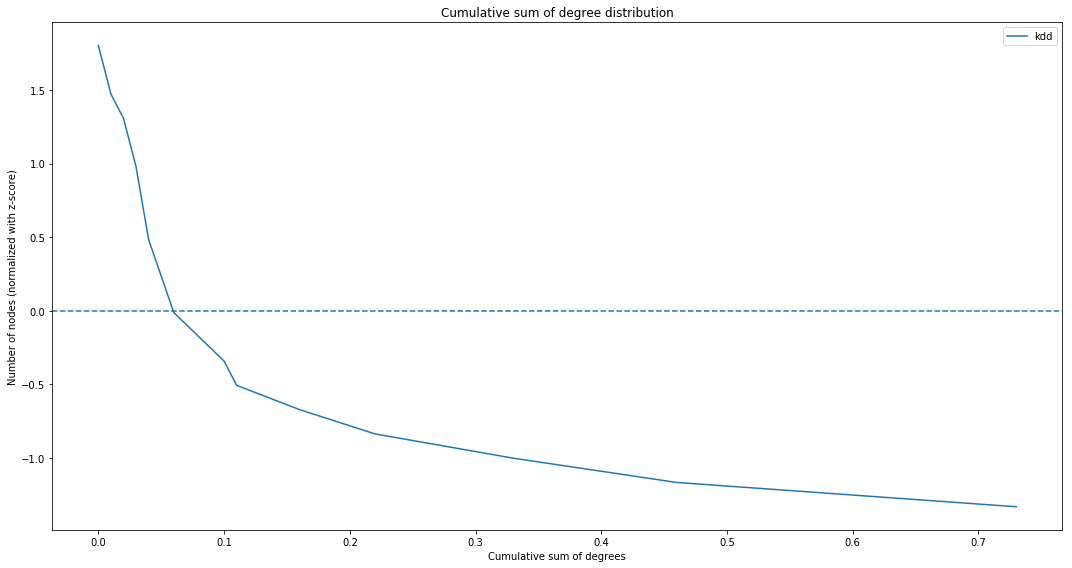

In [12]:
Analysis.plot_compare_cumsum_deg_dist(m)

Cumulative sum of degree distribution shows how the degree is distributed with respect to the number of nodes.

* Nodes with a lower degree (left on the plot) are typically way less than the ones with a high degree (right on the plot).

* Over the dotted line there's a number of node above the mean (the converse below the line) as per z-score.

* Z-score normalization for the number of nodes has been chosen because it preserves the range (maximum and minimum) and introduces the dispersion of the serie (standard deviation / variance)

\begin{align}
P(k) = \frac{\text{# nodes with degree >= k}}{\text{# nodes}}
\end{align}

Cumulative sum of degree distribution is more robust wrt the simple degree distribution because is less subject to small numbers. 

### Communities
Found communities per epsilon parameter.

In [13]:
for data_fn, m_list in m.items():
    print(f'Communities found in {data_fn}')
    display(Analysis.number_of_communities(m_list))

Communities found in kdd


,epsilon,# communities,# nodes,# edges
0,0.25,10,89,410
1,0.50,10,87,400


Network analysis per found communities

In [14]:
for data_fn, m_list in m.items():
    print(f'Metrics for {data_fn}')
    for e, m_element in m_list.items():
        print(e)
        display(Analysis.describe_communities(m_element).describe())

Metrics for kdd
0.25


,# nodes,# edges,avg degree,avg weighted degree,density,strongly conn components,avg clustering,assortativity
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.0,10.000000,10.000000
mean,10.00000,40.000000,7.730920,9.135310,0.576570,1.0,0.705620,-0.455310
std,6.97615,30.648545,1.103687,1.599650,0.224594,0.0,0.111196,0.160889
min,6.00000,18.000000,6.000000,7.333300,0.188300,1.0,0.549000,-0.751000
25%,6.00000,20.750000,6.916700,8.000000,0.541650,1.0,0.604750,-0.551575
50%,6.50000,26.500000,7.811700,8.376600,0.638100,1.0,0.738850,-0.456600
75%,9.25000,42.500000,8.571450,10.149975,0.684550,1.0,0.790275,-0.332700
max,24.00000,104.000000,9.400000,12.000000,0.866700,1.0,0.850000,-0.238300


0.5


,# nodes,# edges,avg degree,avg weighted degree,density,strongly conn components,avg clustering,assortativity
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.000000,10.000000
mean,9.500000,37.900000,7.857200,9.311000,0.576240,1.0,0.694580,-0.454860
std,5.421152,22.683572,1.028693,1.471676,0.212082,0.0,0.119842,0.184512
min,6.000000,18.000000,6.000000,8.000000,0.207900,1.0,0.549000,-0.810800
25%,6.000000,23.750000,7.678600,8.000000,0.541650,1.0,0.596850,-0.486225
50%,7.000000,28.000000,8.002650,9.035700,0.620200,1.0,0.676150,-0.444000
75%,9.500000,43.750000,8.446425,9.978975,0.678600,1.0,0.812625,-0.322775
max,20.000000,79.000000,9.400000,12.000000,0.866700,1.0,0.850000,-0.238300


Size of found communities

kdd


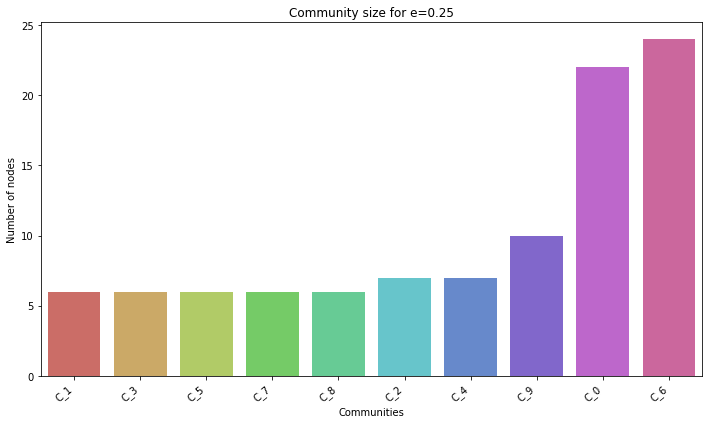

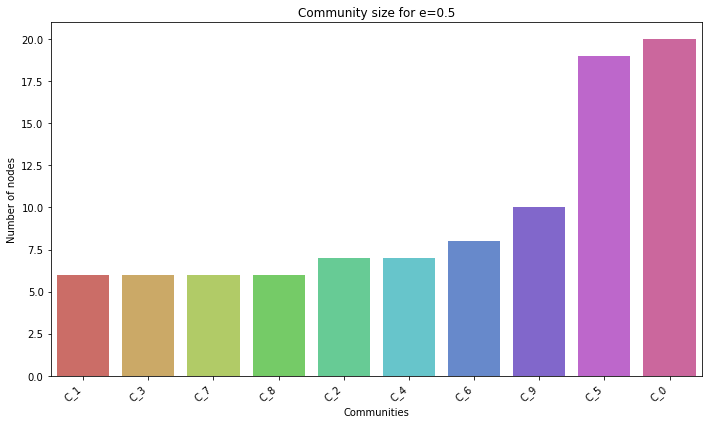

In [15]:
for data_fn, m_list in m.items():
    print(data_fn)
    for e, m_element in m_list.items():
        Analysis.plot_community_size(m_element)

### Communities quality parameters
Survey of modularity measures: https://github.com/Lab41/survey-community-detection 
* *Internal density*: number of edges (ms) in subset S divided by the total number of possible edges between all nodes (ns(ns-1)/2). Higher the better
* *Average degree*: average internal degree across all nodes (ns) in subset S. Higher the better.
* *FOMD (Fraction over median degree)*: Determines the number of nodes that have an internal degree greater than the median degree of nodes in Subset S. Higher the better.
* *Expansion*: can be thought as “External Degree”. Measure of separability. Lower the better.
* *Cut Ratio*: This metric is a measure of separability and can be thought of as "External Density". Lower the better.
* *Conductance*: Ratio of edges inside the cluster to the number of edges leaving the cluster (captures surface area to volume). Higher the better.
* *Normalized Cut*: Represents how well subset S is separated from graph G. Combines Conductance with the fraction of external edges over all non-community edges. Higher the better.
* *Maximum ODF (Out Degree Fraction)*: Fraction of external conections to internal connections for each node (ns) in S. It then returns the fraction with the highest value. Lower the better.
* *Average ODF*: same as Maximum ODF but takes the average. Lower the better.
* *Flake-ODF*: Fraction of the number of nodes that have fewer internal connections than external connections to the number of nodes (ns) in subset S. Higher the better.


In [16]:
for data_fn, m_list in m.items():
    print(f'Communities quality parameters found in {data_fn}')
    for e, pq in Analysis.pquality(m_list):
        print(f'pquality for e={e}')
        display(pq)

Communities quality parameters found in kdd
pquality for e=0.25


,min,max,avg,std
Index,,,,
Normalized Cut,0.000000,0.369116,0.142879,0.111675
Edges inside,0.094156,0.433333,0.288280,0.106527
Average Degree,6.000000,9.400000,7.730909,1.047043
FOMD,0.166667,0.500000,0.403247,0.113734
Expansion,0.000000,3.166667,1.194145,0.998518
Cut Ratio,0.000000,0.038153,0.014743,0.011854
Edges inside,18.000000,104.000000,40.000000,29.075763
Conductance,0.000000,0.345455,0.130538,0.105997
Maximum-ODF,0.000000,20.000000,10.200000,6.660330


pquality for e=0.5


,min,max,avg,std
Index,,,,
Normalized Cut,0.000000,0.369720,0.147295,0.110609
Edges inside,0.103947,0.433333,0.288120,0.100591
Average Degree,6.000000,9.400000,7.857193,0.975897
FOMD,0.166667,0.500000,0.383008,0.112681
Expansion,0.000000,3.166667,1.269568,1.025940
Cut Ratio,0.000000,0.039095,0.016139,0.012603
Edges inside,18.000000,79.000000,37.900000,21.519526
Conductance,0.000000,0.345455,0.133232,0.103491
Maximum-ODF,0.000000,28.000000,11.800000,8.553362


### Similarities
Detect similarities between communities of the same partition.
1. get the top 10 nodes in each community wrt the given metric ("indegree" in this case)
2. apply Kendall-Tau given a pair of top 10 ranked communities

Metrics:
* *Kendall Tau*: it takes values between ±1, with a positive correlation indicating that the ranks of
both variables increase together whilst a negative correlation indicates that as the rank of one variable increases the other one decreases.

  source: [2001 Blackwell Science Ltd, Journal of Clinical Nursing](http://www.blackwellpublishing.com/specialarticles/jcn_10_715.pdf)

\begin{align}
\tau = \frac{(\text{# of concordant pairs}) - (\text{# of disconcordant pairs})}
{N \cdot (N-1)/2}
\end{align}

 * *Indegree*: number of edges entering a node in a direct graph.

* *H-Index*: According to the definition of h-index on Wikipedia:
"A scientist has index h if h of his/her N papers have at least h citations each, and the other N − h papers have no more than h citations each."
For example, given citations = [3, 0, 6, 1, 5], which means the researcher has 5 papers in total and each of them had received 3, 0, 6, 1, 5 citations respectively.
Since the researcher has 3 papers with at least 3 citations each and the remaining two with no more than 3 citations each, his h-index is 3.

  Note: If there are several possible values for h, the maximum one is taken as the h-index.

  source: [Leetcode's Github](https://github.com/kamyu104/LeetCode/blob/master/Python/h-index.py)

#### Similarities between SAME epsilon settings
Find similarities between communities of the same partition settings (since we are using overlapping commmunities detection).

heatmaps for dataset kdd


/home/flaprimo/Development/Workspaces/ZikaProject/Python/twitter-network-analysis/venv/lib/python3.6/site-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


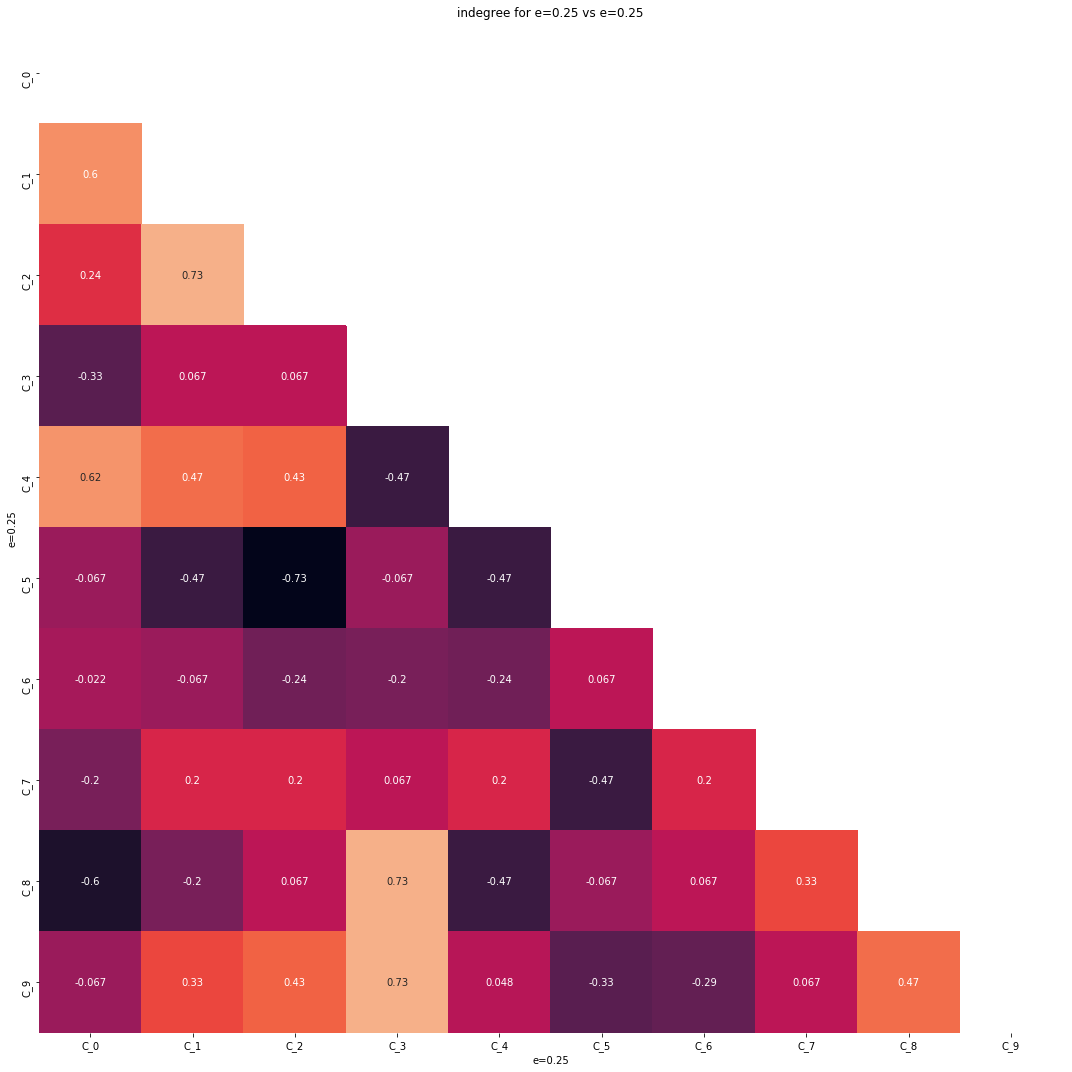

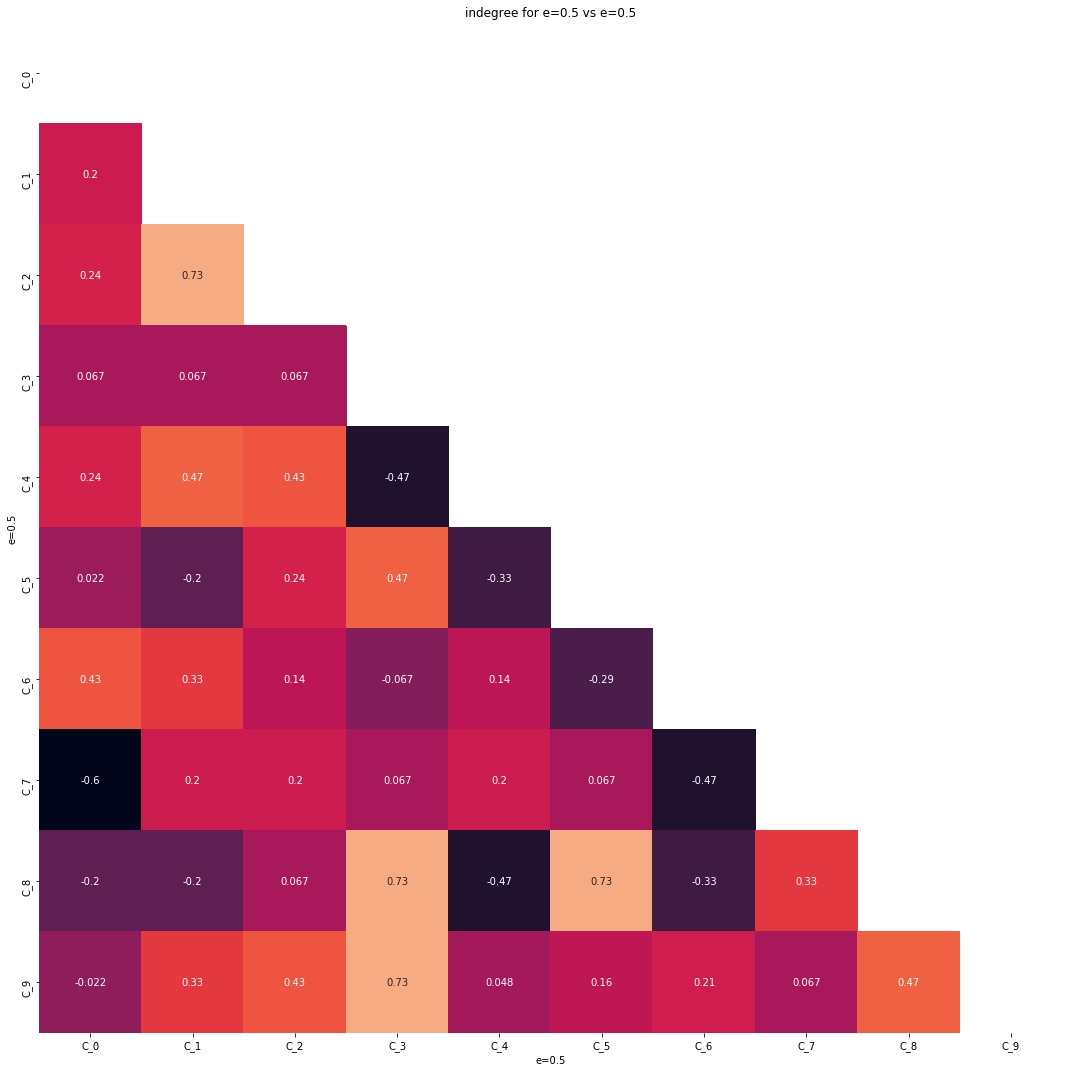

In [17]:
for data_fn, m_list in m.items():
    print(f'heatmaps for dataset {data_fn}')
    Analysis.communities_top_users_heatmap(m_list, metric_name, e_pairs, triangular=True)

In [18]:
for data_fn, m_list in m.items():
    print(f'rankings for dataset {data_fn}')
    r_list = Analysis.communities_top_users_rank(m_list, metric_name, e_pairs, threshold=0.6)
    for r in r_list:
        display(r.round(2))

rankings for dataset kdd


/home/flaprimo/Development/Workspaces/ZikaProject/Python/twitter-network-analysis/venv/lib/python3.6/site-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


,p1_e0.25,p2_e0.25,indegree
0,C_3,C_9,0.73
1,C_3,C_8,0.73
2,C_1,C_2,0.73
3,C_0,C_4,0.62
4,C_0,C_1,0.60


,p1_e0.5,p2_e0.5,indegree
0,C_5,C_8,0.73
1,C_3,C_9,0.73
2,C_3,C_8,0.73
3,C_1,C_2,0.73


#### Similarities between DIFFERENT epsilon settings
Epsilon parameter defines the likeliness of creating new communities.

Thus the most important partitions will likely "survive" with different epsilon settings.

Since we are comparing different partitions the heatmap is not triangular as before.

heatmaps for dataset kdd


/home/flaprimo/Development/Workspaces/ZikaProject/Python/twitter-network-analysis/venv/lib/python3.6/site-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


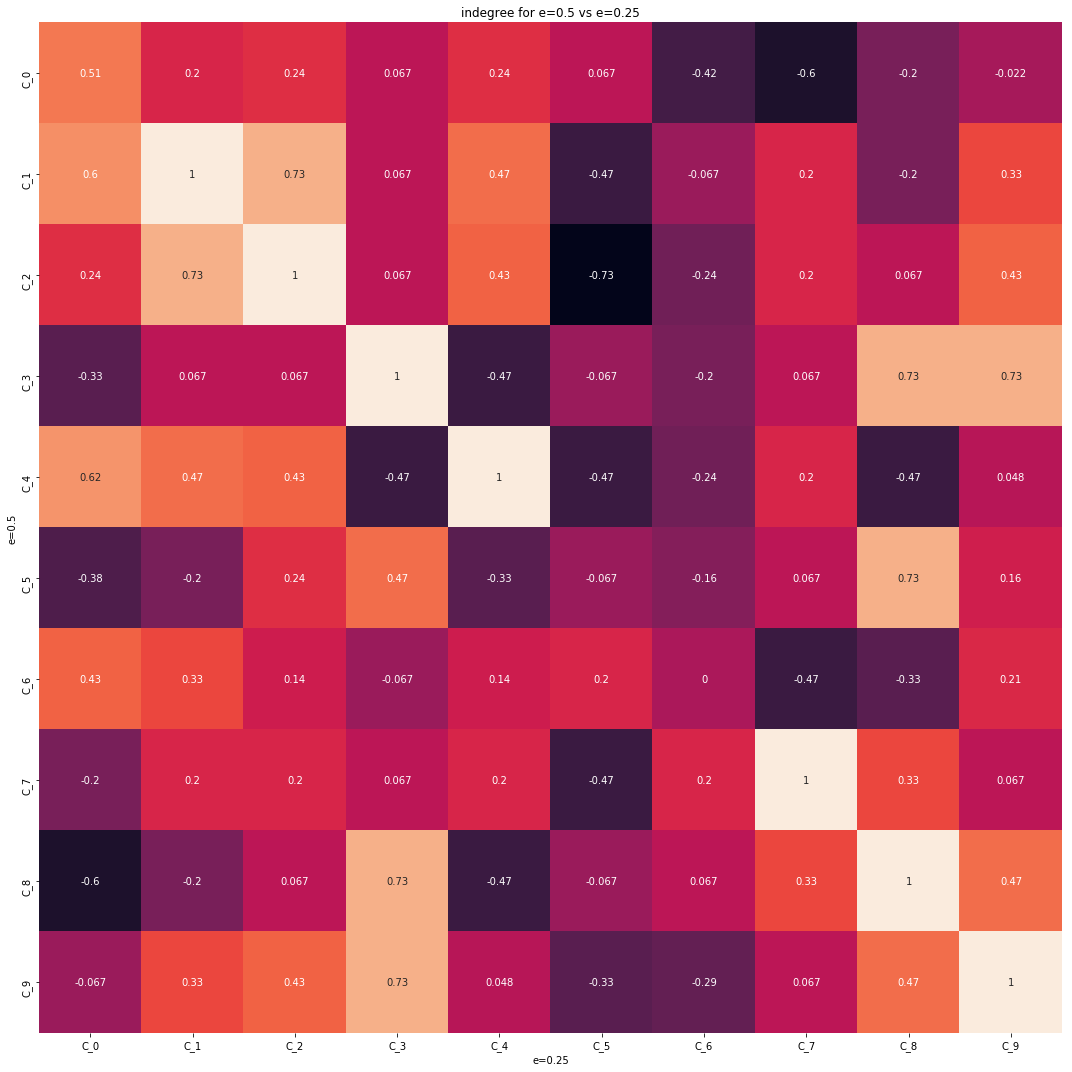

In [19]:
for data_fn, m_list in m.items():
    print(f'heatmaps for dataset {data_fn}')
    Analysis.communities_top_users_heatmap(m_list, metric_name, e_pairwise_combs)

In [20]:
for data_fn in data_filenames:
    print(f'rankings for dataset {data_fn}')
    r_list = Analysis.communities_top_users_rank(m[data_fn], metric_name, e_pairwise_combs, threshold=0.6)
    for r in r_list:
        display(r.round(2))

rankings for dataset kdd


/home/flaprimo/Development/Workspaces/ZikaProject/Python/twitter-network-analysis/venv/lib/python3.6/site-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


,p1_e0.5,p2_e0.25,indegree
0,C_3,C_9,0.73
1,C_3,C_8,0.73
2,C_1,C_2,0.73


## Comparisons
Compare DEMON community results with other community detection algorithms.

Find similarities between partitions found by different community detection algorithms with a heatmap and then list the most correlated communities.

heatmaps for dataset kdd


/home/flaprimo/Development/Workspaces/ZikaProject/Python/twitter-network-analysis/venv/lib/python3.6/site-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


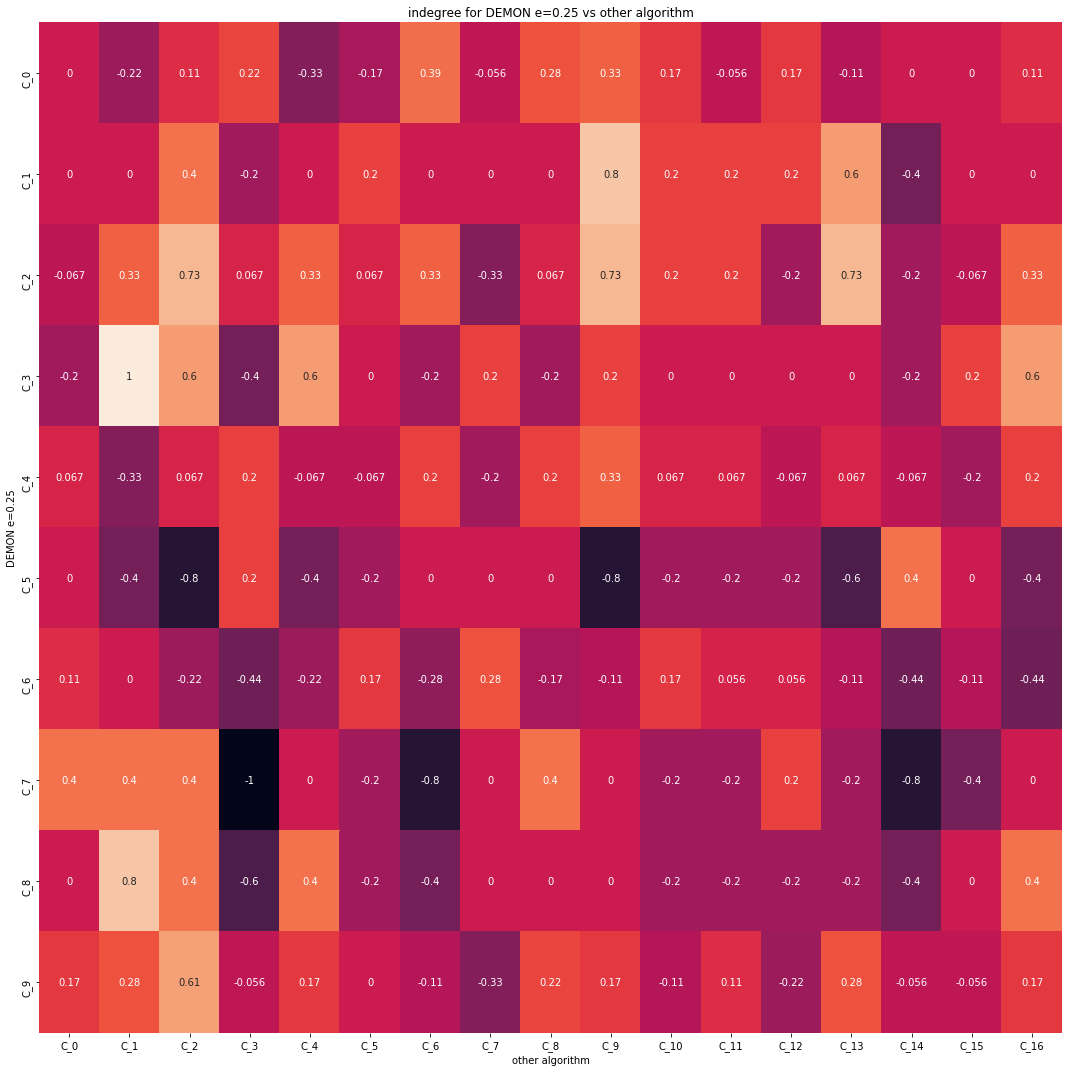

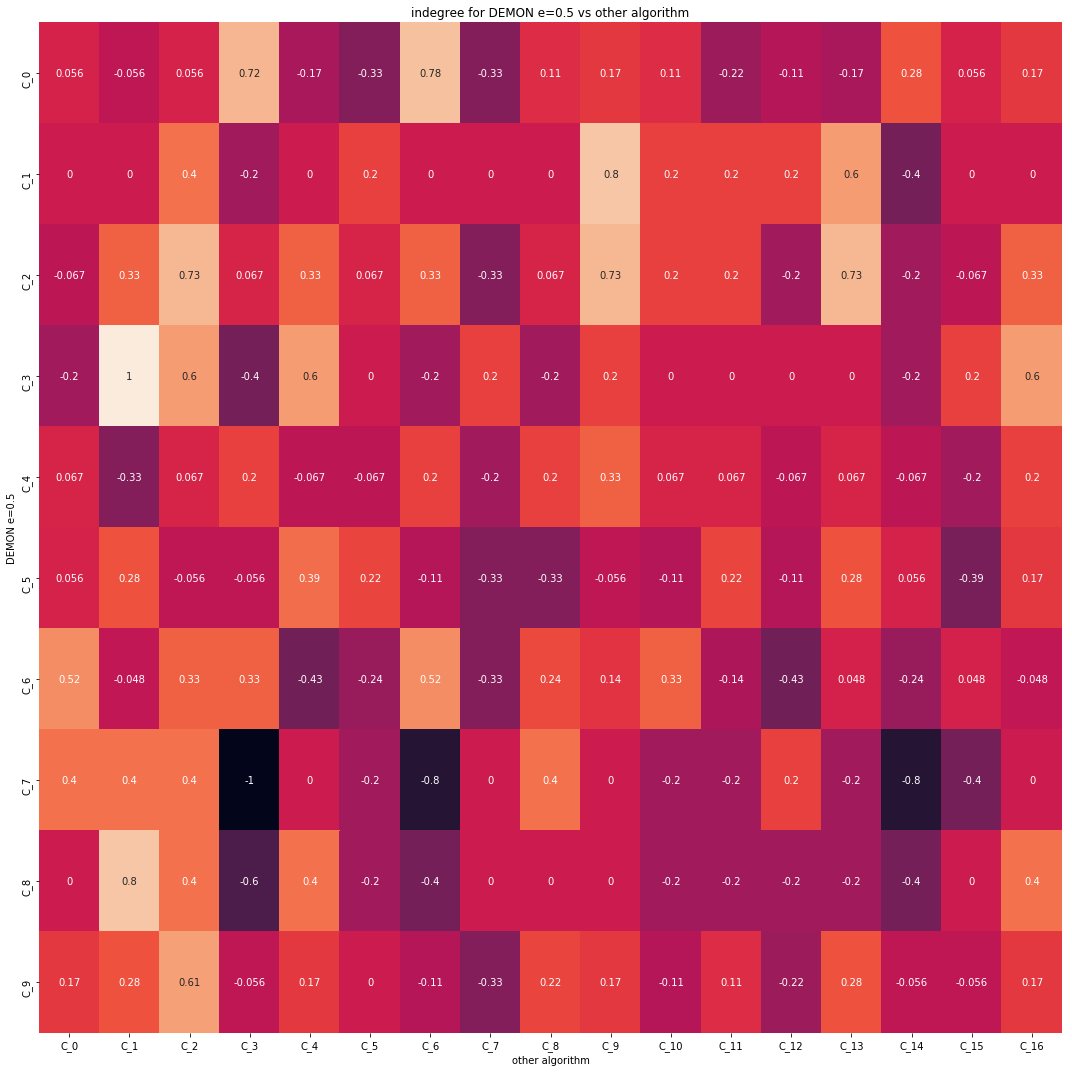

In [21]:
for data_fn, m_list in m.items():
    print(f'heatmaps for dataset {data_fn}')
    c = Comparisons.get_comparison_top_community(m_list[epsilon[0]])
    Comparisons.communities_top_users_heatmap(m_list, c, metric_name)

In [22]:
for data_fn, m_list in m.items():
    print(f'rankings for dataset {data_fn}')
    c = Comparisons.get_comparison_top_community(m_list[epsilon[0]])
    r_list = Comparisons.communities_top_users_rank(m_list, c, metric_name, 0.6)
    for r in r_list:
        display(r.round(2))

rankings for dataset kdd


/home/flaprimo/Development/Workspaces/ZikaProject/Python/twitter-network-analysis/venv/lib/python3.6/site-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


,DEMON e=0.25,other algorithm,indegree
0,C_2,C_9,0.61


,DEMON e=0.5,other algorithm,indegree
0,C_1,C_3,1.00
1,C_2,C_9,0.61
2,C_2,C_3,0.60
